In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('preds_master-testset_phi-4_master-large.csv')

In [6]:
df['model'] = df['model'].str.replace("Instruct", "")
df['model'] = df['model'].str.replace("instruct", "")
df['model'] = df['model'].str.replace("Meta-", "")
df['model'] = df['model'].str.replace("-AWQ", "")
df['model'] = df['model'].str.replace("-INT4", "")
df['model'] = df['model'].str.replace("--", "-")
df["model"] = df["model"].str.replace("-128k", "")
df['model'] = df['model'].str.replace("2025-04-14", "")
df['model'] = df['model'].str.replace("-2407", "")
df['model'] = df['model'].str.replace("-2410", "")
df['model'] = df['model'].str.rstrip("-")

In [7]:
df["bin_preds"] = df["preds"].apply(lambda x: 1 if x > 0.5 else 0)
df

,preds,data,model,label,bin_preds
0,1.000000,nyt-comments,Llama-3.1-8B,1,1
1,1.000000,nyt-comments,Llama-3.1-8B,1,1
2,0.999966,nyt-comments,Llama-3.1-8B,1,1
3,0.999999,nyt-comments,Llama-3.1-8B,1,1
4,0.995071,nyt-comments,Llama-3.1-8B,1,1
...,...,...,...,...,...
357627,0.999973,essays,Phi-3-small,1,1
357628,0.999970,essays,Phi-3-small,1,1
357629,0.999996,essays,Phi-3-small,1,1
357630,0.999997,essays,Phi-3-small,1,1


In [8]:
custom_order = [
    "human",
    "gpt-4.1-nano",
    "Llama-3.1-8B",
    "Llama-3.1-70B",
    "Llama-3.2-3B",
    "Llama-3.3-70B",
    "Phi-3-mini",
    "Phi-3-small",
    "Phi-3-medium",
    "Phi-3.5-mini",
    "Phi-4-mini",
    "phi-4",
    "Ministral-8B",
    "Mistral-Nemo",
    "Qwen2-7B",
    "Qwen2-72B",
    "Qwen2.5-3B",
    "Qwen2.5-7B",
    "Qwen2.5-14B",
    "Qwen2.5-72B",
    "Falcon3-3B",
    "Falcon3-7B"
]

In [9]:
accuracy_df = (
    df.groupby(['model', 'data'])
    .apply(lambda x: (x['bin_preds'] == x['label']).mean())
    .reset_index(name='accuracy')
)

# Step 2: Pivot for heatmap
pivot = accuracy_df.pivot(index='model', columns='data', values='accuracy')
pivot = pivot.reindex(index=custom_order)

/tmp/ipykernel_84961/3373099195.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['bin_preds'] == x['label']).mean())


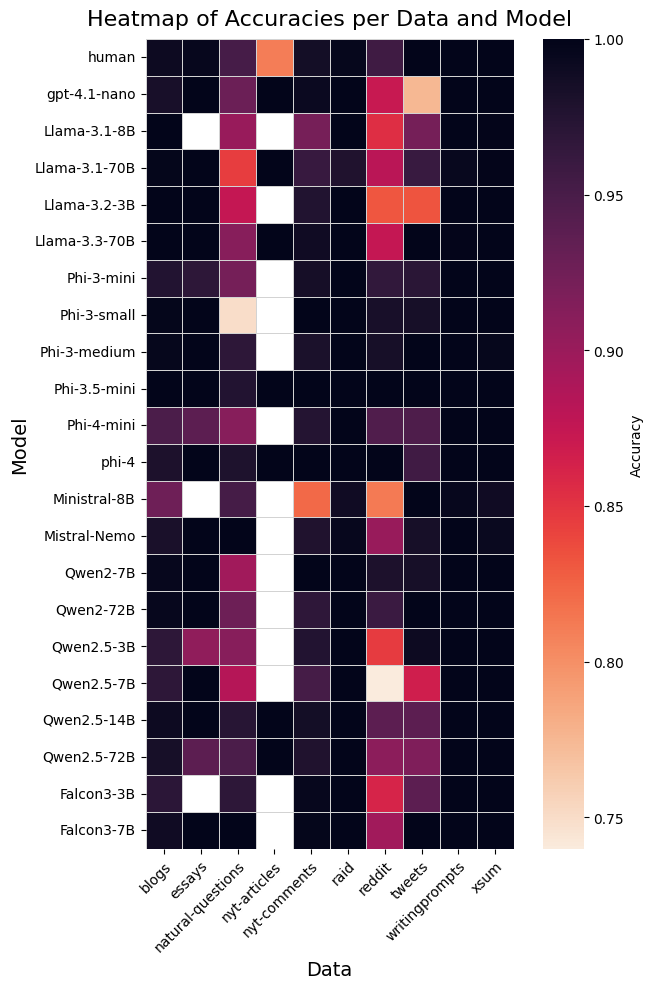

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))  # Use subplots for better axis control

sns.heatmap(
    pivot,
    fmt=".2g",
    cmap=sns.color_palette("rocket_r", as_cmap=True),
    cbar_kws={'label': 'Accuracy', 'shrink': 1, 'pad': 0.02},
    linewidths=0.5,
    linecolor='lightgray',
    square=True,
    ax=ax
)

# Axis titles and styling
ax.set_title("Heatmap of Accuracies per Data and Model", fontsize=16, pad=10)
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Model", fontsize=14)

# Set x-axis tick labels with rotation and style
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor",
    fontsize=10
)

# Set y-axis tick label font size
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=10
)

fig.tight_layout()
plt.show()
